## Graduate admission

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
adm_data_old = pd.read_csv('Admission_Predict.csv')
adm_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [10]:
adm_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Type of data:
GRE score: numerical, interval
TOEFL score: numerical, interval
University Rating: ordinal
SOP: ordinal
LOR: ordinal
Research: Ordinal
CGPA: numerical, interval

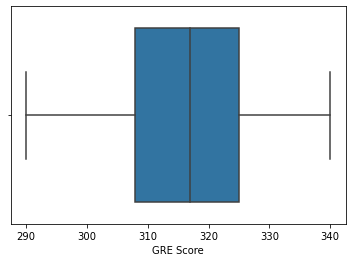

In [11]:
sns.boxplot(adm_data['GRE Score'])

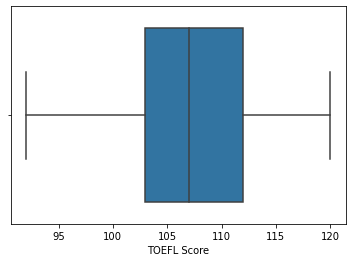

In [12]:
sns.boxplot(adm_data['TOEFL Score'])

The GRE and TOEFL scores looks in good shapes

## Machine learning

### Linear regression

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [14]:
lr_data = adm_data.copy()

In [16]:
lr_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
# Apply minmax scaling for the data
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
for column in columns:
    lr_data[column] = (lr_data[column]-lr_data[column].min())/(lr_data[column].max()-lr_data[column].min())

In [24]:
X = lr_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = lr_data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.score(X_test, y_test)

0.8127800620182746

In [31]:
from sklearn.metrics import r2_score
y_predict = lr.predict(X_test)
r2_score = r2_score(y_test, y_predict)

In [35]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_predict))

0.05696357814430853

In [32]:
r2_score

0.8127800620182746

([<matplotlib.axis.YTick at 0x185de876a88>,
 [Text(0, 0, 'University Rating'),
  Text(0, 0, 'Research'),
  Text(0, 0, 'SOP'),
  Text(0, 0, 'TOEFL Score'),
  Text(0, 0, 'LOR '),
  Text(0, 0, 'GRE Score'),
  Text(0, 0, 'CGPA')])

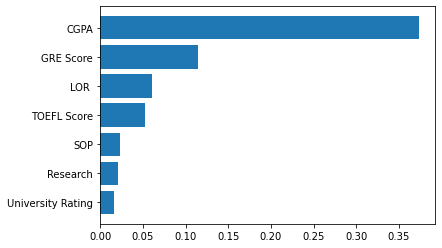

In [29]:
import matplotlib.pyplot as plt
plt.barh(range(len(lr.coef_)), np.sort(lr.coef_))
plt.yticks(range(len(lr.coef_)), [X.columns[i] for i in np.argsort(lr.coef_)])

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.7740105650263693

([<matplotlib.axis.YTick at 0x185e0f45b48>,
 [Text(0, 0, 'Research'),
  Text(0, 0, 'University Rating'),
  Text(0, 0, 'LOR '),
  Text(0, 0, 'SOP'),
  Text(0, 0, 'TOEFL Score'),
  Text(0, 0, 'GRE Score'),
  Text(0, 0, 'CGPA')])

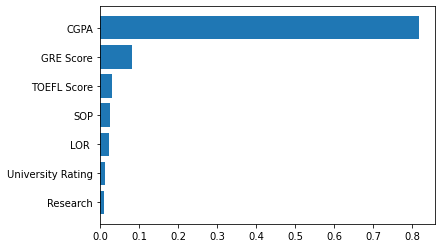

In [36]:
plt.barh(range(len(rfr.feature_importances_)), np.sort(rfr.feature_importances_))
plt.yticks(range(len(rfr.feature_importances_)), [X_train.columns[i] for i in np.argsort(rfr.feature_importances_)])

### Conclusion and suggestions
- It appears the cumulative GPA is most important for admission, get a better GPA
- GRE score is the second important, try to get a better GRE score
- TOEFL is the third